In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from skimage.io import imread
import cv2
#from math import log10, sqrt

In [2]:
def gray(img):
    channel = img.shape[2]
    if (channel > 1):
        g_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        return(g_img)
    else:
        return(img)

In [3]:
def convert_binary(image_src, thresh_val):
    color_1 = 255
    color_2 = 0
    initial_conv = np.where((image_src <= thresh_val), image_src, color_1)
    final_conv = np.where((initial_conv > thresh_val), initial_conv, color_2)
    return final_conv

def binarize_this(image_file, thresh_val=127):
    image_b = convert_binary(image_src=image_file, thresh_val=thresh_val)
    return image_b

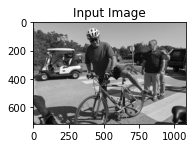

In [4]:
im = imread('biden_fall_1.png')
im =gray(im)
plt.subplot(121)
imgplot = plt.imshow(im,cmap="gray") # Displaying the image
plt.title('Input Image')
plt.show()

In [5]:
im.shape

(720, 1080)

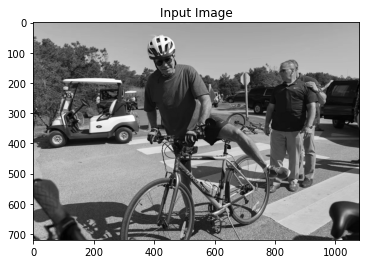

In [6]:
imgplot = plt.imshow(im,cmap="gray") # Displaying the image
plt.title('Input Image')
plt.show()

In [7]:
# Taking a matrix of size 4 as the kernel
kernel = np.ones((4,4), np.uint8)

In [8]:
img_erosion = cv2.erode(im, kernel, iterations=1)
img_erosion_array=np.array(img_erosion ,dtype=np.float)
img_dilation = cv2.dilate(im, kernel, iterations=1)
img_dilation_array=np.array(img_dilation,dtype=np.float)
img_open = cv2.morphologyEx(im, cv2.MORPH_OPEN, kernel)
img_open_array = np.array(img_open ,dtype=np.float)
img_close = cv2.morphologyEx(im, cv2.MORPH_CLOSE, kernel)
img_close_array = np.array(img_close ,dtype=np.float)

C:\Users\NASLEJ~1\AppData\Local\Temp/ipykernel_10380/623946592.py:12: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  img_erosion_array=np.array(img_erosion ,dtype=np.float)
C:\Users\NASLEJ~1\AppData\Local\Temp/ipykernel_10380/623946592.py:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  img_dilation_array=np.array(img_dilation,dtype=np.fl

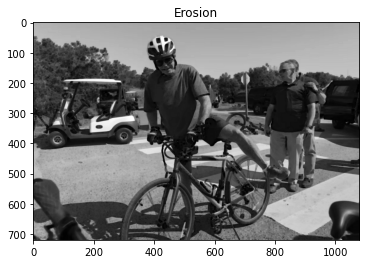

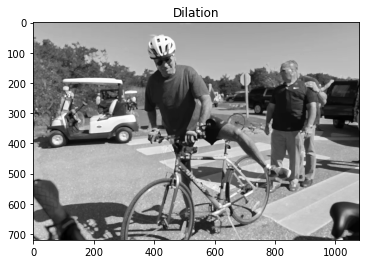

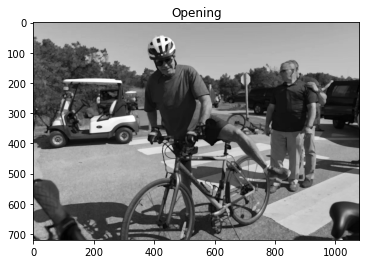

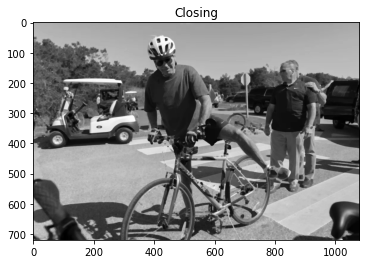

In [9]:
imgplot=plt.imshow(img_erosion,cmap="gray")
plt.title('Erosion')
plt.show()
imgplot=plt.imshow(img_dilation,cmap="gray")
plt.title('Dilation')
plt.show()
imgplot=plt.imshow(img_open,cmap="gray")
plt.title('Opening')
plt.show()
imgplot=plt.imshow(img_close,cmap="gray")
plt.title('Closing')
plt.show()

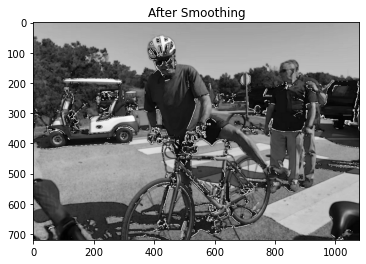

In [12]:
img_smooth_array = ((img_close_array-img_dilation_array)/2+ (img_open_array+img_erosion_array)/2)
img_smooth= np.array(img_smooth_array ,dtype= np.uint8)
imgplot=plt.imshow(img_smooth,cmap="gray")
plt.title('After Smoothing')
plt.show()

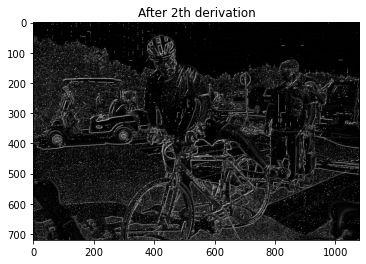

In [13]:
img_der = im - img_smooth
imgplot=plt.imshow(img_der,cmap="gray")
plt.title('After 2th derivation')
plt.show()

In [14]:
img_der

array([[  1,   1,   1, ...,   0,   0,   0],
       [  0,   0,   1, ...,   0,   0,   0],
       [  1,   1,   1, ...,   1,   1,   1],
       ...,
       [ 70,  63,  72, ...,   1,   1,   1],
       [ 38,  30,  34, ...,   1,   1,   1],
       [ 12,   3,   7, ..., 255, 255, 255]], dtype=uint8)